In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Define functions

In [2]:
def L(theta,nu,const):
    """
    loss function
    theta:mean
    nu: precision
    """
    return np.log(nu)-(1+theta**2)/2*(nu**2)+(theta**2)/2*(nu**4)+const*(theta**4)*(nu**8)

def dL_theta(theta,nu,const):
    """
    derivative of theta
    theta:mean
    nu: precision
    """
    return -theta*(nu**2)+theta*(nu**4)+4*const*(theta**3)*(nu**8)

def dL_nu(theta,nu,const):
    """
    derivative of nu
    theta:mean
    nu: precision
    """
    return 1/nu-(1+theta**2)*nu+2*(theta**2)*(nu**3)+8*const*(theta**4)*(nu**7)

In [3]:
theta_star=0
nu_star=1

GD:

In [4]:
def gd(iteration,theta0,nu0,theta_star,nu_star,const,eta,beta):
    
    theta=theta0
    nu=nu0
    
    L_val_GD=np.array([])
    DIFF_theta_GD=np.array([])
    DIFF_nu_GD=np.array([])
    for i in range(iteration):
        L_val_GD=np.append(L_val_GD,L(theta,nu,const))
        DIFF_theta_GD=np.append(DIFF_theta_GD,abs(theta-theta_star))
        DIFF_nu_GD=np.append(DIFF_nu_GD,abs(nu-nu_star))
        
        DLN_theta=dL_theta(theta,nu,const)
        DLN_nu=dL_nu(theta,nu,const)
        
        theta=theta+eta*DLN_theta
        nu=nu+eta*DLN_nu
    return DIFF_theta_GD, DIFF_nu_GD

Adagrad

In [5]:
def adagd(iteration,theta0,nu0,theta_star,nu_star,const,eta,beta):
    
    theta=theta0
    nu=nu0
    
    L_val=np.array([])
    DIFF_theta=np.array([])
    DIFF_nu=np.array([])
    for i in range(iteration):
        L_val=np.append(L_val,L(theta,nu,const))
        DIFF_theta=np.append(DIFF_theta,abs(theta-theta_star))
        DIFF_nu=np.append(DIFF_nu,abs(nu-nu_star))
        
        DLN_theta=dL_theta(theta,nu,const)
        DLN_nu=dL_nu(theta,nu,const)
        
        theta=theta+eta/(beta**i)*DLN_theta
        nu=nu+eta*DLN_nu
    return DIFF_theta, DIFF_nu

Text(0, 0.5, 'log ||theta-theta*||')

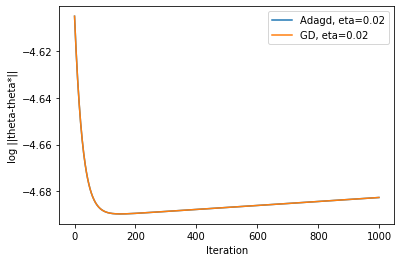

In [10]:
iteration=1000

theta0=0.01 #initial
nu0=0.9   #initial 
const=1

beta=1
eta=0.02


DIFF_adagrad_theta,DIFF_adagrad_nu=adagd(iteration,theta0,nu0,theta_star,nu_star,const,eta,beta)
DIFF_GD_theta,DIFF_GD_nu=gd(iteration,theta0,nu0,theta_star,nu_star,const,eta,beta)
plt.plot(range(iteration), np.log(DIFF_adagrad_theta), label='Adagd, eta=0.02')
plt.plot(range(iteration), np.log(DIFF_GD_theta), label='GD, eta=0.02')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('log ||theta-theta*||')

Text(0, 0.5, 'log ||nu-nu*||')

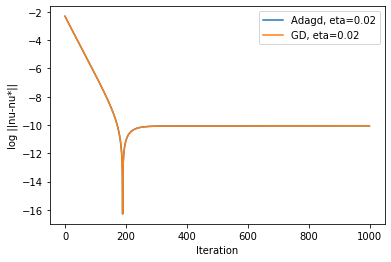

In [7]:
plt.plot(range(iteration), np.log(DIFF_adagrad_nu), label='Adagd, eta=0.02')
plt.plot(range(iteration), np.log(DIFF_GD_nu), label='GD, eta=0.02')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('log ||nu-nu*||')